In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [135]:
df_train = pd.read_csv('/home/ghost/Documents/py_data_science_udemy/misc/Py_DS_ML_Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_train.csv')

In [136]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [137]:
# Looking for null valuse in data
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

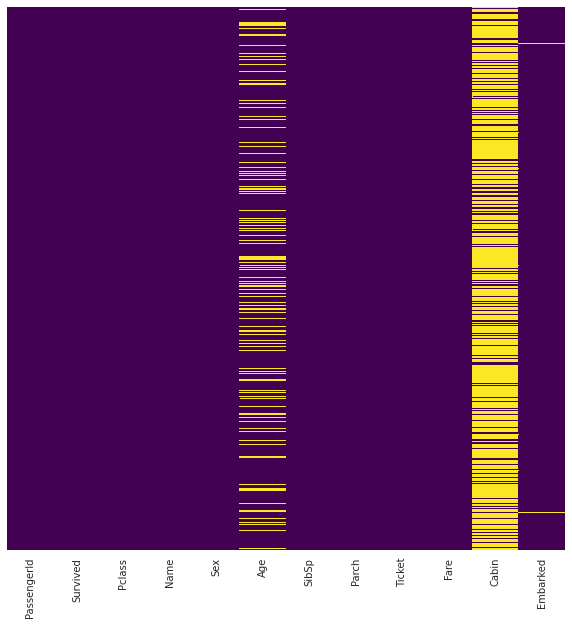

In [138]:
# Visual inspection of null values
plt.figure(figsize = (10,10))
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [139]:
sns.set_style('whitegrid')

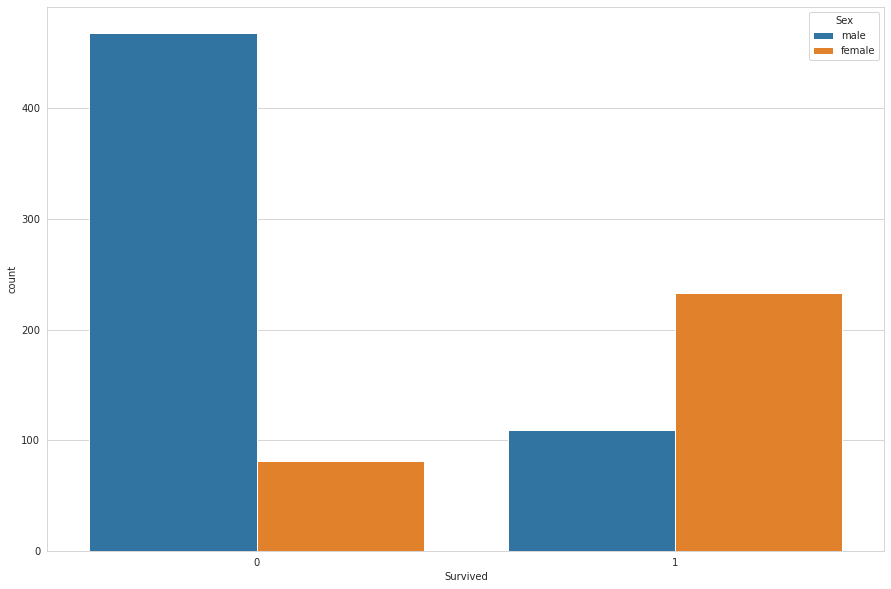

In [140]:
# Survivers based on gender
plt.figure(figsize=(15,10))
sns.countplot(x='Survived', hue='Sex', data=df_train);

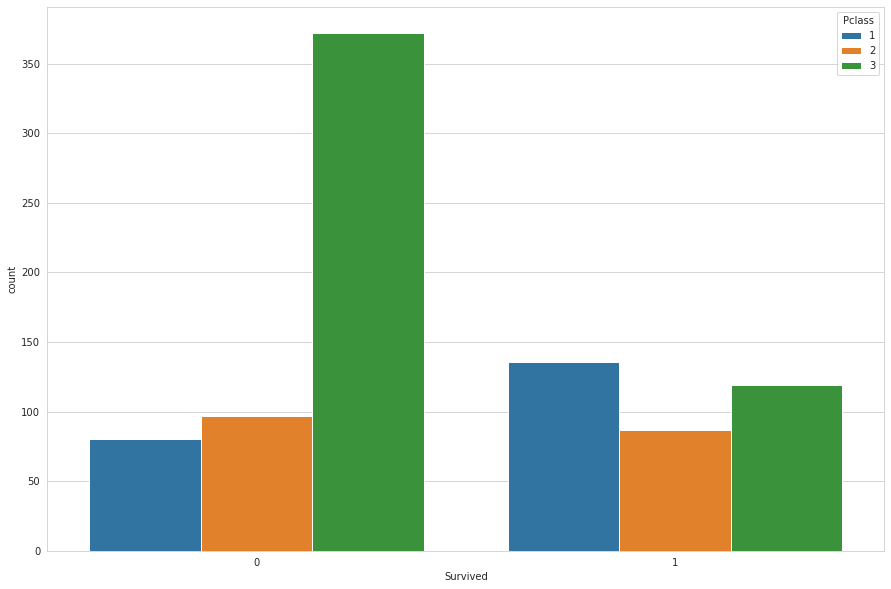

In [141]:
# Survivers based on class
plt.figure(figsize=(15,10))
sns.countplot(x='Survived', hue='Pclass', data=df_train);

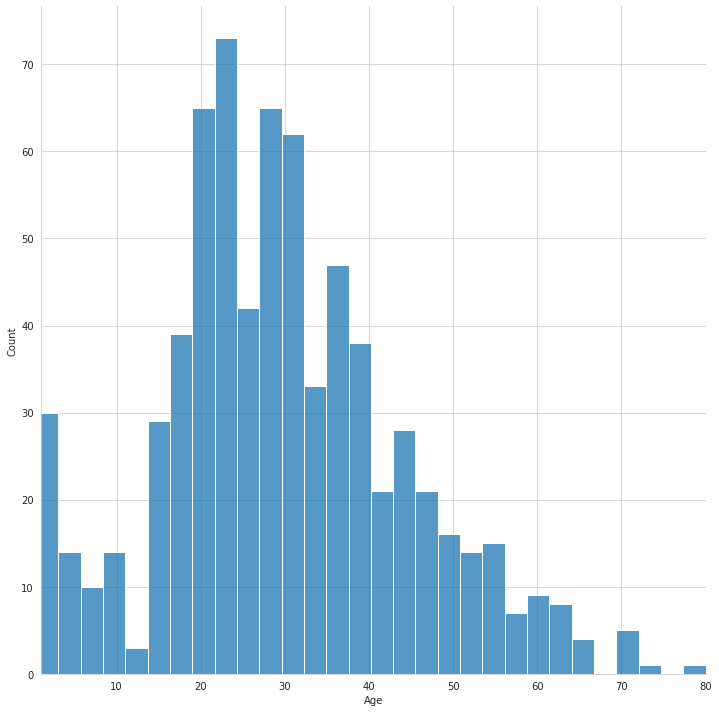

In [142]:
# Evaluating age range
sns.displot(df_train['Age'].dropna(), kde=False, bins=30, height=10, aspect=1)
plt.xlim(1, 80);

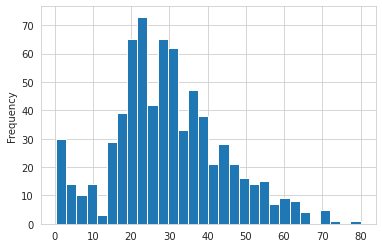

In [143]:
df_train['Age'].plot.hist(bins=30);

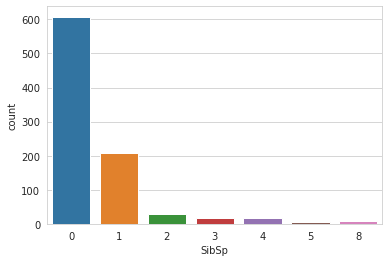

In [144]:
sns.countplot(x='SibSp', data=df_train);

(1.0, 550.0)

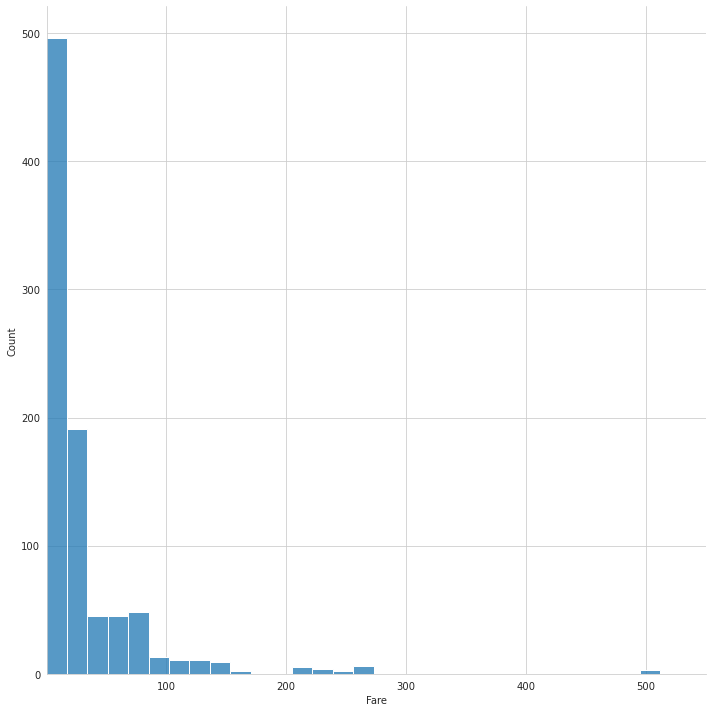

In [145]:
# evaluating fares
sns.displot(df_train['Fare'], bins=30, kde=False, height=10, aspect=1)
plt.xlim(1,550)

In [146]:
import sys
import cufflinks as cf

In [147]:
cf.go_offline()

In [148]:
df_train['Fare'].iplot(kind='hist', bins=50)

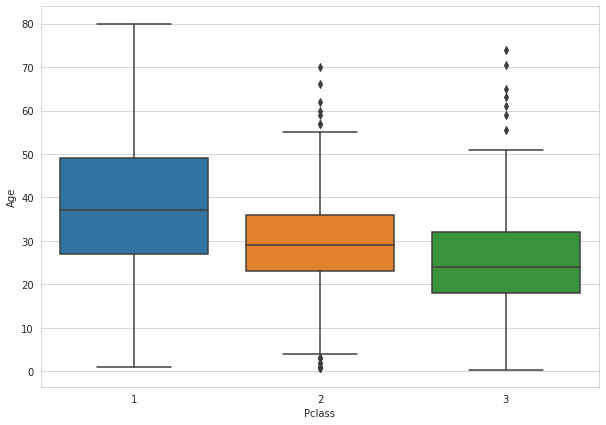

In [149]:
# Evaluating age and pclass
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=df_train);

In [150]:
# Created function to impute missing ages
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [151]:
df_train['Age'] = df_train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

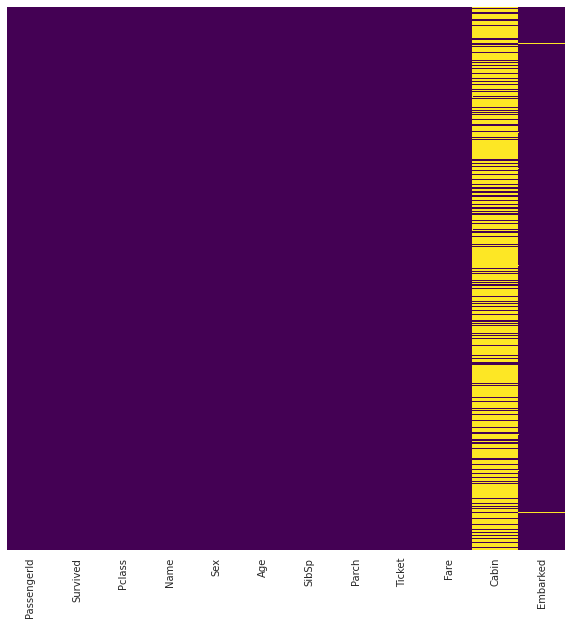

In [152]:
# Visual inspection of null values
plt.figure(figsize=(10,10))
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [153]:
# Dropping cabin values due to amount of missing data
df_train.drop('Cabin', axis=1, inplace=True)

In [154]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

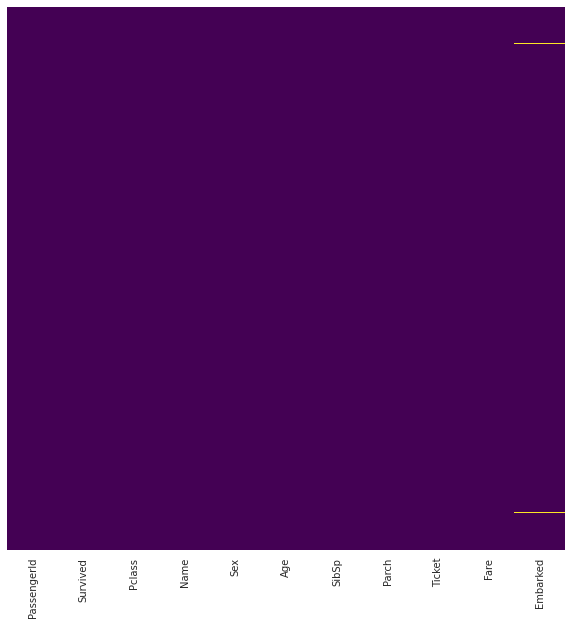

In [155]:
# Visual inspection of null values
plt.figure(figsize=(10, 10))
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [156]:
# Droppiong remaining null values
df_train.dropna(inplace=True)

<AxesSubplot:>

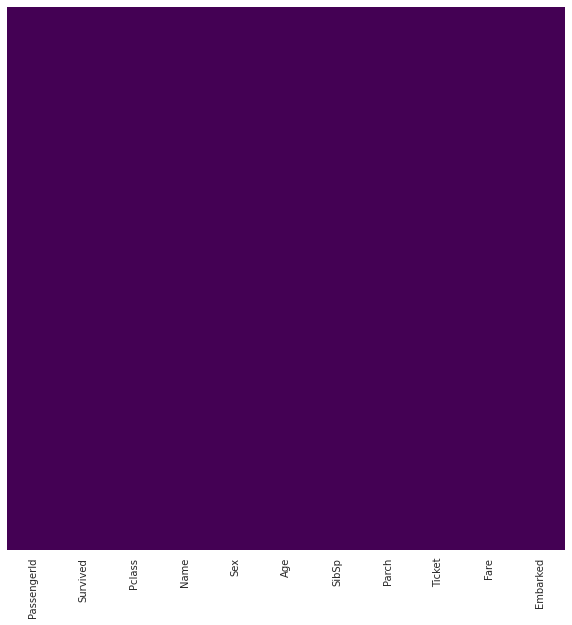

In [157]:
# Visual inspection of null values
plt.figure(figsize=(10, 10))
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [158]:
sex = pd.get_dummies(df_train['Sex'], drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [159]:
embark = pd.get_dummies(df_train['Embarked'], drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [160]:
df_train = pd.concat([df_train, sex, embark], axis=1)

In [161]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [162]:
df_train.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [163]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [164]:
df_train.drop('PassengerId', axis=1, inplace=True)

In [165]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [166]:
# After creating model with Pclass as catogorical use get_dummies and run again to see the difference with that column.

In [167]:
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [169]:
log_model = LogisticRegression(max_iter = 200)

In [170]:
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [171]:
preds = log_model.predict(X_test)

In [172]:
print(preds)

[0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 1]


In [173]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [174]:
confusion_matrix(y_test, preds)

array([[150,  13],
       [ 32,  72]])